Participant P01, Session 1, Duration STD: 3.55 seconds
Participant P01, Session 2, Duration STD: 5.38 seconds
Participant P01, Session 3, Duration STD: 6.95 seconds
Participant P02, Session 1, Duration STD: 2.99 seconds
Participant P02, Session 2, Duration STD: 2.18 seconds
Participant P02, Session 3, Duration STD: 2.30 seconds
Participant P03, Session 1, Duration STD: 3.11 seconds
Participant P03, Session 2, Duration STD: 1.60 seconds
Participant P03, Session 3, Duration STD: 1.34 seconds
Participant P04, Session 1, Duration STD: 6.29 seconds
Participant P04, Session 2, Duration STD: 6.52 seconds
Participant P04, Session 3, Duration STD: 5.01 seconds
Participant P05, Session 1, Duration STD: 4.93 seconds
Participant P05, Session 2, Duration STD: 3.45 seconds
Participant P05, Session 3, Duration STD: 2.97 seconds
Participant P06, Session 1, Duration STD: 2.34 seconds
Participant P06, Session 2, Duration STD: 2.67 seconds
Participant P06, Session 3, Duration STD: 2.07 seconds
Participan

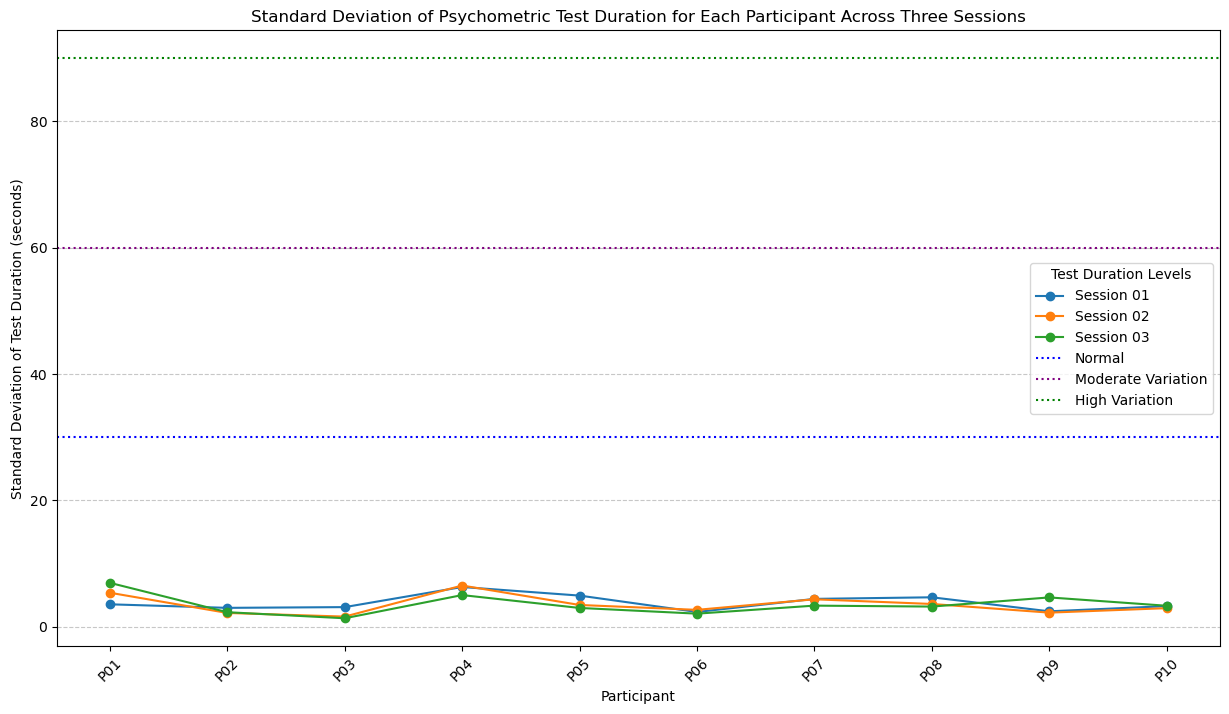

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate duration standard deviation
def calculate_duration_std(psychometric_data):
    psychometric_data['Question Start Time'] = pd.to_datetime(psychometric_data['Question Start Time']).dt.tz_localize(None)
    psychometric_data['Question Answer Time'] = pd.to_datetime(psychometric_data['Question Answer Time']).dt.tz_localize(None)
    psychometric_data['answer_duration'] = (psychometric_data['Question Answer Time'] - psychometric_data['Question Start Time']).dt.total_seconds()
    std_duration = psychometric_data['answer_duration'].std()
    return std_duration

# Load datasets for all participants
participants_data = {
    'P01': [pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/Psychometric_Test_Results_03.csv')],
    'P02': [pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/Psychometric_Test_Results_03.csv')],
    'P03': [pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/Psychometric_Test_Results_03.csv')],
    'P04': [pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/Psychometric_Test_Results_03.csv')],
    'P05': [pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/Psychometric_Test_Results_03.csv')],
    'P06': [pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/Psychometric_Test_Results_03.csv')],
    'P07': [pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/Psychometric_Test_Results_03.csv')],
    'P08': [pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/Psychometric_Test_Results_03.csv')],
    'P09': [pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/Psychometric_Test_Results_03.csv')],
    'P10': [pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/Psychometric_Test_Results_03.csv')]
}

# Initialize a list to collect the duration std results
results = []

# Process data for each participant
for participant_id, data in participants_data.items():
    participant_results = {'Participant': participant_id}
    for session_number, df in enumerate(data, start=1):
        std_dev = calculate_duration_std(df)
        participant_results[f'Session {session_number:02d}'] = std_dev
        # Debug print for verification
        print(f"Participant {participant_id}, Session {session_number}, Duration STD: {std_dev:.2f} seconds")
    results.append(participant_results)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to a CSV file
results_df.to_csv('/Users/urmebose/Desktop/Psychometric_Test_Duration_STD_Results.csv', index=False)

# Plot the standard deviations of psychometric test duration for each participant across three sessions
results_df.set_index('Participant', inplace=True)
results_df.plot(figsize=(15, 8), marker='o')

plt.title('Standard Deviation of Psychometric Test Duration for Each Participant Across Three Sessions')
plt.ylabel('Standard Deviation of Test Duration (seconds)')
plt.xlabel('Participant')
plt.xticks(ticks=np.arange(len(results_df.index)), labels=results_df.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add reference lines for normal, moderate, and high variations (these are arbitrary values for demonstration purposes)
plt.axhline(y=30, color='blue', linestyle=':', label='Normal')
plt.axhline(y=60, color='purple', linestyle=':', label='Moderate Variation')
plt.axhline(y=90, color='green', linestyle=':', label='High Variation')

plt.legend(title='Test Duration Levels')
plt.show()